## To run this file:
Put these files in one folder:
- This file (HW 02.ipynb)
- hw2_SMS5736
- hw2_tests

After files are in one folder, run all cells in this notebook

## Create MySorted class containing two new sorting functions and the default

In [1]:
class MySorted:

    def __init__(self):
        self.merge_counter = 0

    def bubble_sorted(self, a_list, key = None, reverse = False):
        
        import time
        
        if isinstance(a_list, dict):
            a_list = list(a_list.keys()).copy()
        
        else:
            a_list = a_list.copy()

        ft = time.perf_counter()    

        swaps = 0
        compares = 0

        if not key:
            def key(x):
                return x
            key=key

        for _ in range(0, len(a_list)):
            try:
                if swaps == temp:
                    break
            except NameError:
                pass
            
            temp = swaps

            for i in range(0, len(a_list)-1):
                if key(a_list[i]) > key(a_list[i+1]):
                    a_list[i], a_list[i+1] = a_list[i+1], a_list[i]
                    swaps += 1
                compares += 1

        if reverse:
            return [a_list[::-1], compares, swaps, time.perf_counter() - ft]

        return [a_list, compares, swaps, time.perf_counter() - ft]

    def merge_sorted(self, a_list, key = None, reverse = False):
        import time
        
        if isinstance(a_list, dict):
            temp = list(a_list.keys())
            
        else:
            temp = a_list.copy()

        self.merge_counter = 0
        
        ft = time.perf_counter()
        MySorted.merge_sorted_process(self, temp, key = key)
        et = time.perf_counter() - ft

        if reverse:
            temp = temp[::-1]

        return [temp, self.merge_counter, 0, et]
    
    def merge_sorted_process(self, a_list, key = None):
        
        if key is None:
            def key(x):
                return x
            key = key

        if len(a_list) > 1:

            mid = len(a_list) // 2
            left_half = a_list[:mid]
            right_half = a_list[mid:]

            MySorted.merge_sorted_process(self, left_half, key = key)
            MySorted.merge_sorted_process(self, right_half, key = key)

            i = 0
            j = 0
            k = 0


            while i < len(left_half) and j < len(right_half):
                self.merge_counter += 1
                if key(left_half[i]) < key(right_half[j]):
                    a_list[k] = left_half[i]
                    i = i + 1
                else:
                    a_list[k] = right_half[j]
                    j = j + 1
                k = k + 1

            while i < len(left_half):
                a_list[k] = left_half[i]
                i = i + 1
                k = k + 1

            while j < len(right_half):
                a_list[k] = right_half[j]
                j = j + 1
                k = k + 1
            
            return a_list
        
        else:
            return a_list
        
    def sort_sorted(self, a_list, key = None, reverse = False):
        import time
    
        temp = a_list.copy()
        
        ft = time.perf_counter()
        temp = sorted(temp, key = key, reverse = reverse)
        et = time.perf_counter() - ft
        return [temp, 0, 0, et]

## Test sorting functions using hw2_tests.py

In [2]:
%run -i "hw2_tests.py"

bubble incorrect cases: 0 /20,  merge incorrect cases: 0 /20


## Get time data

In [3]:
import random
import numpy as np
import pandas as pd

f = MySorted()

func_bubble = f.bubble_sorted
func_merged = f.merge_sorted
func_sorted = f.sort_sorted

def key(x):
    return x

n_tests = 5

tests = [1, 5, 10, 25, 50, 100, 250, 
         500, 1000, 2000, 4000, 
         6000, 8000, 10000]

ind = []

times_dict = {"n_list": [],
              "bubble_sort_time": [], 
              "merge_sort_time": [], 
              "sorted_sort_time": []}

for i, ns in enumerate(tests):
    
    bubble_times = []
    merge_times = []
    sorted_times = []
    
    for _ in range(n_tests):
        
        randomlist = random.sample(range(-1000000, 1000000), ns)

        bubble_times.append(func_bubble(randomlist, key=key)[3])
        merge_times.append(func_merged(randomlist, key=key)[3])
        sorted_times.append(func_sorted(randomlist, key=key)[3])

    times_dict["n_list"].append(ns)
    times_dict["bubble_sort_time"].append(np.mean(bubble_times))
    times_dict["merge_sort_time"].append(np.mean(merge_times))
    times_dict["sorted_sort_time"].append(np.mean(sorted_times))
    ind.append(i)
    
df_times = pd.DataFrame(data = times_dict, index = ind)

## Plot time data

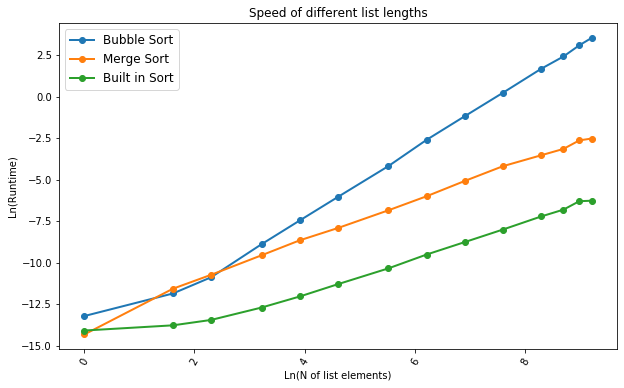

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
linewidth = 2

ax.plot(np.log(df_times['n_list']), np.log(df_times['bubble_sort_time']), 
        marker='o', linewidth = linewidth, label='Bubble Sort')
ax.plot(np.log(df_times['n_list']), np.log(df_times['merge_sort_time']), 
        marker='o', linewidth = linewidth, label='Merge Sort')
ax.plot(np.log(df_times['n_list']), np.log(df_times['sorted_sort_time']), 
        marker='o', linewidth = linewidth, label='Built in Sort')
plt.xticks(rotation=60)
ax.set_xlabel('Ln(N of list elements)')
ax.set_ylabel('Ln(Runtime)')
plt.title("Speed of different list lengths")
plt.legend(prop={'size': 12})
plt.show()

## Summary plot of data

In [5]:
df_times

,n_list,bubble_sort_time,merge_sort_time,sorted_sort_time
0,1,0.000002,6.000000e-07,7.600000e-07
1,5,0.000007,9.460000e-06,1.040000e-06
2,10,0.000019,2.188000e-05,1.440000e-06
3,25,0.000139,7.092000e-05,3.040000e-06
4,50,0.000579,1.749200e-04,5.920000e-06
5,100,0.002392,3.671400e-04,1.244000e-05
6,250,0.015345,1.067880e-03,3.224000e-05
7,500,0.074672,2.489980e-03,7.418000e-05
8,1000,0.310357,6.260000e-03,1.572400e-04
9,2000,1.275893,1.525230e-02,3.350400e-04
